https://www.dropbox.com/scl/fi/s96qd5tgr972wybd7z0n2/navier-stokes.npz?rlkey=8fw1kwnamcl2xaty57tnoau3e&st=rrfv05zm&dl=1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


In [65]:
with np.load('navier-stokes.npz') as data:
    flow = data['flow']
    re = data['re']

print(flow.shape, re.shape)
    

(36, 39, 128, 256) (36,)


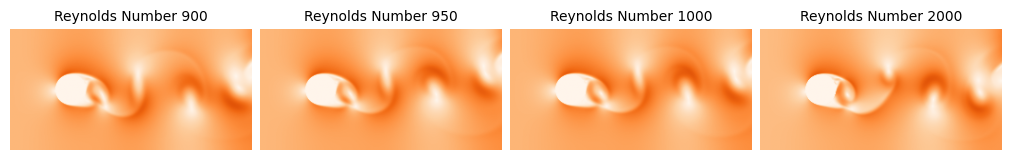

In [ ]:


def visualize_flows(data, labels, cmap='RdYlBu', vmin=None, vmax=None):
    # Define the number of flows and time length
    C, T, _, _ = data.shape

    # Compute vmin and vmax per channel
    if vmin is None:
        vmin = data.min(axis=(1, 2, 3))  # Min for each channel
    if vmax is None:
        vmax = data.max(axis=(1, 2, 3))  # Max for each channel

    # Initialize figure and axes
    fig, axes = plt.subplots(1, C, figsize=(C * 2.5, 2.5), constrained_layout=True)

    if C == 1:
        axes = [axes]  # Ensure axes is iterable for a single-channel case

    # Display initial frame and set titles
    images = []
    for c, ax in enumerate(axes):
        images.append(ax.imshow(data[c, 0], cmap=cmap, vmin=vmin[c], vmax=vmax[c]))
        ax.set_title(labels[c], fontsize=10)
        ax.axis("off")

    # Animation update function
    def update(frame):
        """ Update function for animation. """
        for c in range(C):
            images[c].set_array(data[c, frame])
        return images

    # Set up animation
    ani = animation.FuncAnimation(fig, update, frames=T, interval=100, blit=False)

    # Display the animation
    return HTML(ani.to_jshtml())

# I = np.arange(len(flow))
# np.random.shuffle(I)
# I = I[:4]
I = np.arange(24,28)
visualize_flows(flow[I,:,:,:], [f"Reynolds Number {re[i]}" for i in I], "Oranges")
# plt.show()


array([13, 15, 19, 21, 26, 32,  8, 11, 12, 14, 16, 18,  0, 20,  2, 23, 24,
        3, 27, 29,  4, 31,  5, 33, 34,  7,  9, 17,  1, 22, 25, 28, 30,  6,
       35, 10])